In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

In [3]:
path = 'D:/html_statement_analysis'

In [4]:
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()

In [5]:
os.chdir(path)
current_path()


Current working directory before
D:\html_statement_analysis



In [6]:
def PD_from_Excel(file_name, ncolumns):
    df = pd.read_excel(file_name, index_col=0)
    df = df.iloc[:, 0:ncolumns]
    df = df.loc[df['Profit'].isnull() == False]
    df = df.loc[df['Open Time'].isnull() == False]
    df = df.loc[df['Profit'] != 'Profit']
    df_buysell = df.loc[df['Type'] != 'balance']
    df_fees = df.loc[df['Type'] == 'balance']
    df_buysell = df_buysell.loc[df_buysell['Close Time'].isnull() == False]
    df_buysell = df_buysell.loc[df_buysell['Close Time']  != ' ']
    dfr = pd.concat([df_buysell, df_fees])
    return dfr

In [31]:
file_name = 'IF3730462.xlsx'    
df0 = PD_from_Excel(file_name, 13)
df0

Open Time     Type               Size    Item   Price  \
Ticket                                                                        
1806583627  2022.09.28 14:23:55     sell                0.5  gbpusd  1.0548   
1806583123  2022.09.28 14:21:26     sell                0.5  gbpusd  1.0552   
1806582545  2022.09.28 14:16:52     sell                0.5  gbpusd  1.0555   
1806582230  2022.09.28 14:16:38     sell                0.5  gbpusd  1.0562   
1806582080  2022.09.28 14:16:33     sell                0.5  gbpusd  1.0566   
...                         ...      ...                ...     ...     ...   
1803673179  2022.08.06 09:19:27  balance  Forex custody fee     NaN     NaN   
1803621819  2022.08.05 09:21:30  balance  Forex custody fee     NaN     NaN   
1803553103  2022.08.04 09:19:17  balance  Forex custody fee     NaN     NaN   
1803487769  2022.08.03 09:20:55  balance  Forex custody fee     NaN     NaN   
1803403283  2022.08.02 09:24:34  balance  Forex custody fee     NaN     NaN   

           S / L T / P           Close Time Price.1 Commission Taxes Swap  \
Ticket                                                                      
1806583627     0     0  2022.09.28 14:23:58  1.0544          0     0    0   
1806583123     0     0  2022.09.28 14:23:55  1.0551          0     0    0   
1806582545     0     0  2022.09.28 14:21:25  1.0555          0     0    0   
1806582230     0     0  2022.09.28 14:16:51  1.0561          0     0    0   
1806582080     0     0  2022.09.28 14:16:36  1.0565          0     0    0   
...          ...   ...                  ...     ...        ...   ...  ...   
1803673179   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1803621819   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1803553103   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1803487769   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1803403283   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   

           Profit  
Ticket             
1806583627      2  
1806583123    0.5  
1806582545      0  
1806582230    0.5  
1806582080    0.5  
...           ...  
1803673179  -2.38  
1803621819  -2.38  
1803553103  -7.72  
1803487769  -2.21  
1803403283  -2.21  

[380 rows x 13 columns]

In [28]:
file_name = 'IF3730474.xlsx'    
df = PD_from_Excel(file_name, 13)
df

Open Time     Type               Size    Item   Price  \
Ticket                                                                        
1801749589  2022.06.30 17:17:36      buy                0.5  gbpusd  1.2177   
1801749590  2022.06.30 17:17:36     sell                0.5  nzdusd  0.6233   
1802479009  2022.07.14 16:32:59     sell                0.5  gbpusd   1.178   
1802479144  2022.07.14 16:33:05      buy                0.4  gbpjpy  164.22   
1802506353  2022.07.14 19:57:53     sell                0.5  gbpusd  1.1776   
...                         ...      ...                ...     ...     ...   
1806959242  2022.10.04 09:25:51  balance  Forex custody fee     NaN     NaN   
1807061991  2022.10.05 16:21:53  balance  Forex custody fee     NaN     NaN   
1807112238  2022.10.06 09:31:15  balance  Forex custody fee     NaN     NaN   
1807186347  2022.10.07 10:27:43  balance  Forex custody fee     NaN     NaN   
1807231015  2022.10.08 10:23:33  balance  Forex custody fee     NaN     NaN   

           S / L T / P           Close Time Price.1 Commission Taxes Swap  \
Ticket                                                                      
1801749589     0     0  2022.08.02 08:35:32  1.2253          0     0    0   
1801749590     0     0  2022.08.02 08:35:32  0.6308          0     0    0   
1802479009     0     0  2022.08.30 17:55:09  1.1625          0     0    0   
1802479144     0     0  2022.08.30 17:55:10  161.57          0     0    0   
1802506353     0     0  2022.08.18 21:02:38  1.1925          0     0    0   
...          ...   ...                  ...     ...        ...   ...  ...   
1806959242   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807061991   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807112238   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807186347   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807231015   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   

           Profit  
Ticket             
1801749589     38  
1801749590  -37.5  
1802479009   77.5  
1802479144 -76.24  
1802506353  -74.5  
...           ...  
1806959242   -1.2  
1807061991   -1.2  
1807112238  -5.53  
1807186347  -1.85  
1807231015  -1.85  

[387 rows x 13 columns]

In [29]:
df = pd.concat([df0, df])


In [13]:
df

Open Time     Type               Size    Item   Price  \
Ticket                                                                        
1806583627  2022.09.28 14:23:55     sell                0.5  gbpusd  1.0548   
1806583123  2022.09.28 14:21:26     sell                0.5  gbpusd  1.0552   
1806582545  2022.09.28 14:16:52     sell                0.5  gbpusd  1.0555   
1806582230  2022.09.28 14:16:38     sell                0.5  gbpusd  1.0562   
1806582080  2022.09.28 14:16:33     sell                0.5  gbpusd  1.0566   
...                         ...      ...                ...     ...     ...   
1806959242  2022.10.04 09:25:51  balance  Forex custody fee     NaN     NaN   
1807061991  2022.10.05 16:21:53  balance  Forex custody fee     NaN     NaN   
1807112238  2022.10.06 09:31:15  balance  Forex custody fee     NaN     NaN   
1807186347  2022.10.07 10:27:43  balance  Forex custody fee     NaN     NaN   
1807231015  2022.10.08 10:23:33  balance  Forex custody fee     NaN     NaN   

           S / L T / P           Close Time Price.1 Commission Taxes Swap  \
Ticket                                                                      
1806583627     0     0  2022.09.28 14:23:58  1.0544          0     0    0   
1806583123     0     0  2022.09.28 14:23:55  1.0551          0     0    0   
1806582545     0     0  2022.09.28 14:21:25  1.0555          0     0    0   
1806582230     0     0  2022.09.28 14:16:51  1.0561          0     0    0   
1806582080     0     0  2022.09.28 14:16:36  1.0565          0     0    0   
...          ...   ...                  ...     ...        ...   ...  ...   
1806959242   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807061991   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807112238   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807186347   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   
1807231015   NaN   NaN                  NaN     NaN        NaN   NaN  NaN   

           Profit  
Ticket             
1806583627      2  
1806583123    0.5  
1806582545      0  
1806582230    0.5  
1806582080    0.5  
...           ...  
1806959242   -1.2  
1807061991   -1.2  
1807112238  -5.53  
1807186347  -1.85  
1807231015  -1.85  

[767 rows x 13 columns]

In [14]:
df_broker_fees = df.loc[df['Type'] == 'balance']
TotalCustodyFees = df_broker_fees['Profit'].sum()
print(TotalCustodyFees)

-385.6299999999998


In [15]:
df_strategy_transactions = df.loc[df['Type'] != 'balance']

In [57]:
df_strategy_transactions

Open Time  Type Size    Item   Price S / L T / P  \
Ticket                                                                   
1806583627  2022.09.28 14:23:55  sell  0.5  gbpusd  1.0548     0     0   
1806583123  2022.09.28 14:21:26  sell  0.5  gbpusd  1.0552     0     0   
1806582545  2022.09.28 14:16:52  sell  0.5  gbpusd  1.0555     0     0   
1806582230  2022.09.28 14:16:38  sell  0.5  gbpusd  1.0562     0     0   
1806582080  2022.09.28 14:16:33  sell  0.5  gbpusd  1.0566     0     0   
...                         ...   ...  ...     ...     ...   ...   ...   
1807064972  2022.10.05 16:55:58  sell  0.5  eurusd  0.9878     0     0   
1807173284  2022.10.07 00:41:33  sell  0.5  usdchf  0.9886     0     0   
1807173347  2022.10.07 00:59:24  sell  0.5  usdchf  0.9877     0     0   
1807173745  2022.10.07 01:33:28  sell  0.5  eurusd  0.9795     0     0   
1807247674  2022.10.10 08:33:13  sell  0.5  usdchf  0.9943     0     0   

                     Close Time Price.1 Commission Taxes Swap Profit  
Ticket                                                                
1806583627  2022.09.28 14:23:58  1.0544          0     0    0      2  
1806583123  2022.09.28 14:23:55  1.0551          0     0    0    0.5  
1806582545  2022.09.28 14:21:25  1.0555          0     0    0      0  
1806582230  2022.09.28 14:16:51  1.0561          0     0    0    0.5  
1806582080  2022.09.28 14:16:36  1.0565          0     0    0    0.5  
...                         ...     ...        ...   ...  ...    ...  
1807064972  2022.10.07 00:41:32  0.9797          0     0    0   40.5  
1807173284  2022.10.07 00:59:23  0.9885          0     0    0   0.51  
1807173347  2022.10.10 08:33:09  0.9947          0     0    0 -35.19  
1807173745  2022.10.10 08:33:11  0.9724          0     0    0   35.5  
1807247674  2022.10.10 08:50:39  0.9942          0     0    0    0.5  

[667 rows x 13 columns]

In [16]:
df_strategy_transactions=df_strategy_transactions.sort_values(by='Close Time', ascending=True)
print(df_strategy_transactions)

                      Open Time  Type Size    Item   Price S / L T / P  \
Ticket                                                                   
1801749589  2022.06.30 17:17:36   buy  0.5  gbpusd  1.2177     0     0   
1801749590  2022.06.30 17:17:36  sell  0.5  nzdusd  0.6233     0     0   
1803400320  2022.08.02 09:00:02   buy  0.5  gbpusd  1.2245     0     0   
1803399877  2022.08.02 08:53:34  sell  0.5  nzdusd    0.63     0     0   
1803432212  2022.08.02 16:33:05  sell  0.5  nzdusd  0.6285     0     0   
...                         ...   ...  ...     ...     ...   ...   ...   
1807056870  2022.10.05 15:36:15  sell  0.5  usdchf  0.9812     0     0   
1807173284  2022.10.07 00:41:33  sell  0.5  usdchf  0.9886     0     0   
1807173347  2022.10.07 00:59:24  sell  0.5  usdchf  0.9877     0     0   
1807173745  2022.10.07 01:33:28  sell  0.5  eurusd  0.9795     0     0   
1807247674  2022.10.10 08:33:13  sell  0.5  usdchf  0.9943     0     0   

                     Close Time Price

In [17]:
TotalProfit = df_strategy_transactions['Profit'].sum()
print(TotalProfit)

355.41999999999973


In [20]:
def equity_plot(pd_df,column_name):
    v = np.asarray(pd_df[column_name])
    plt.plot(np.cumsum(v))    

In [21]:
df_broker_fees['Close Time'] = np.asarray(df_broker_fees['Open Time'])
df_broker_fees

C:\Users\Vlad\AppData\Local\Temp/ipykernel_10008/720720886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broker_fees['Close Time'] = np.asarray(df_broker_fees['Open Time'])


Open Time     Type               Size Item Price S / L  \
Ticket                                                                         
1807231012  2022.10.08 10:23:33  balance  Forex custody fee  NaN   NaN   NaN   
1807186354  2022.10.07 10:27:43  balance  Forex custody fee  NaN   NaN   NaN   
1807112241  2022.10.06 09:31:15  balance  Forex custody fee  NaN   NaN   NaN   
1807061979  2022.10.05 16:21:53  balance  Forex custody fee  NaN   NaN   NaN   
1806959241  2022.10.04 09:25:51  balance  Forex custody fee  NaN   NaN   NaN   
...                         ...      ...                ...  ...   ...   ...   
1806959242  2022.10.04 09:25:51  balance  Forex custody fee  NaN   NaN   NaN   
1807061991  2022.10.05 16:21:53  balance  Forex custody fee  NaN   NaN   NaN   
1807112238  2022.10.06 09:31:15  balance  Forex custody fee  NaN   NaN   NaN   
1807186347  2022.10.07 10:27:43  balance  Forex custody fee  NaN   NaN   NaN   
1807231015  2022.10.08 10:23:33  balance  Forex custody fee  NaN   NaN   NaN   

           T / P           Close Time Price.1 Commission Taxes Swap Profit  
Ticket                                                                      
1807231012   NaN  2022.10.08 10:23:33     NaN        NaN   NaN  NaN  -4.57  
1807186354   NaN  2022.10.07 10:27:43     NaN        NaN   NaN  NaN  -4.57  
1807112241   NaN  2022.10.06 09:31:15     NaN        NaN   NaN  NaN -13.67  
1807061979   NaN  2022.10.05 16:21:53     NaN        NaN   NaN  NaN  -4.09  
1806959241   NaN  2022.10.04 09:25:51     NaN        NaN   NaN  NaN  -3.92  
...          ...                  ...     ...        ...   ...  ...    ...  
1806959242   NaN  2022.10.04 09:25:51     NaN        NaN   NaN  NaN   -1.2  
1807061991   NaN  2022.10.05 16:21:53     NaN        NaN   NaN  NaN   -1.2  
1807112238   NaN  2022.10.06 09:31:15     NaN        NaN   NaN  NaN  -5.53  
1807186347   NaN  2022.10.07 10:27:43     NaN        NaN   NaN  NaN  -1.85  
1807231015   NaN  2022.10.08 10:23:33     NaN        NaN   NaN  NaN  -1.85  

[100 rows x 13 columns]

In [22]:
df = pd.concat([df_broker_fees, df_strategy_transactions])

In [23]:
df=df.sort_values(by='Close Time', ascending=True)

In [24]:
df

Open Time     Type               Size    Item   Price  \
Ticket                                                                        
1801749589  2022.06.30 17:17:36      buy                0.5  gbpusd  1.2177   
1801749590  2022.06.30 17:17:36     sell                0.5  nzdusd  0.6233   
1803403287  2022.08.02 09:24:34  balance  Forex custody fee     NaN     NaN   
1803403283  2022.08.02 09:24:34  balance  Forex custody fee     NaN     NaN   
1803399877  2022.08.02 08:53:34     sell                0.5  nzdusd    0.63   
...                         ...      ...                ...     ...     ...   
1807231012  2022.10.08 10:23:33  balance  Forex custody fee     NaN     NaN   
1807231015  2022.10.08 10:23:33  balance  Forex custody fee     NaN     NaN   
1807173347  2022.10.07 00:59:24     sell                0.5  usdchf  0.9877   
1807173745  2022.10.07 01:33:28     sell                0.5  eurusd  0.9795   
1807247674  2022.10.10 08:33:13     sell                0.5  usdchf  0.9943   

           S / L T / P           Close Time Price.1 Commission Taxes Swap  \
Ticket                                                                      
1801749589     0     0  2022.08.02 08:35:32  1.2253          0     0    0   
1801749590     0     0  2022.08.02 08:35:32  0.6308          0     0    0   
1803403287   NaN   NaN  2022.08.02 09:24:34     NaN        NaN   NaN  NaN   
1803403283   NaN   NaN  2022.08.02 09:24:34     NaN        NaN   NaN  NaN   
1803399877     0     0  2022.08.02 16:12:34   0.629          0     0    0   
...          ...   ...                  ...     ...        ...   ...  ...   
1807231012   NaN   NaN  2022.10.08 10:23:33     NaN        NaN   NaN  NaN   
1807231015   NaN   NaN  2022.10.08 10:23:33     NaN        NaN   NaN  NaN   
1807173347     0     0  2022.10.10 08:33:09  0.9947          0     0    0   
1807173745     0     0  2022.10.10 08:33:11  0.9724          0     0    0   
1807247674     0     0  2022.10.10 08:50:39  0.9942          0     0    0   

           Profit  
Ticket             
1801749589     38  
1801749590  -37.5  
1803403287  -1.78  
1803403283  -2.21  
1803399877      5  
...           ...  
1807231012  -4.57  
1807231015  -1.85  
1807173347 -35.19  
1807173745   35.5  
1807247674    0.5  

[767 rows x 13 columns]

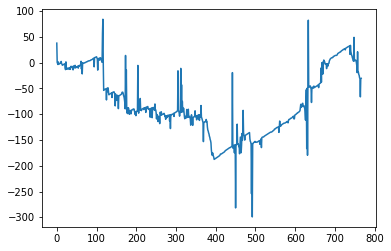

In [25]:
equity_plot(df,'Profit')

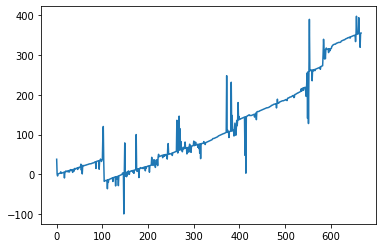

In [26]:
equity_plot(df_strategy_transactions,'Profit')

In [86]:
df.to_excel("final_output.xlsx") 